In [ ]:
# 테스트 데이터셋
!pip install seaborn


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u



 >>> Tuning Decision Tree...
Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
- Complete:18.45006초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
- Complete:4.14713초

 >>> Tuning KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
- Complete:0.08466초

 >>> Tuning SVM...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
- Complete:41.12252초

 >>> Tuning XGBoost...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
- Complete:0.59555초

=== Final Comparison ===
        Model                                                                       Best Params  Train Accuracy (CV)  Test Accuracy
      XGBoost                                              {'max_depth': 2, 'n_estimators': 50}             0.825835       0.821229
Random Forest                                             {'max_depth': 6, 'n_estimators': 100}             0.824436       0.804469
Decision Tree {'max_depth': 3, 'max_featur

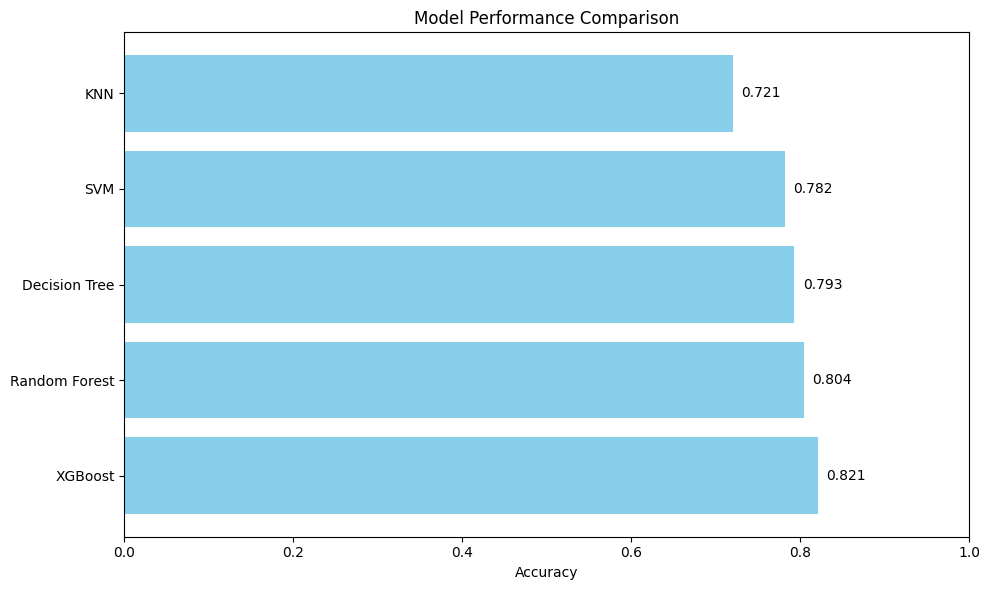


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.81      0.65      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



TypeError: plot_confusion_matrix() got an unexpected keyword argument 'model_name'

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import sys
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning

# 테스트 데이터셋
import seaborn as sns

# 데이터 로드
df = sns.load_dataset('titanic')

# 필드 선택 및 결측치 처리
features = ['pclass', 'sex', 'age', 'fare', 'embarked', 'alone']
target = 'survived'

X = df[features]
y = df[target]

# 범주형 변수 인코딩 (sex, embarked, alone)
X = pd.get_dummies(X, columns=['sex', 'embarked', 'alone'])

# 결측치 처리 (age, fare는 평균으로, embarked는 최빈값으로)
X['age'] = X['age'].fillna(X['age'].mean())
X['fare'] = X['fare'].fillna(X['fare'].mean())

################################################################
# 모델 및 파라미터 그리드 정의
base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

param_grids = {
    "Decision Tree": {"max_depth":range(1, 7), "max_leaf_nodes": range(10, 56, 5), "min_samples_leaf": range(10, 1001, 50), "max_features": range(1, 13, 2)},
    "Random Forest": {'n_estimators': [50, 100, 200, 400], 'max_depth':range(1, 7)},
    "KNN": {'n_neighbors': range(3,7), 'weights': ['uniform', 'distance']},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear']},
    "XGBoost": {'n_estimators': [50, 100, 200, 400], 'max_depth': range(1,7)}
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)